In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
from PIL import Image
from urllib import request
from io import BytesIO
import matplotlib.pyplot as plt
import sys
from sklearn.neighbors import NearestNeighbors
import sys
import traceback 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn import manifold

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielensposter/movie_poster.csv


In [2]:
data = pd.read_csv("/kaggle/input/movielensposter/movie_poster.csv", header=None) 

In [22]:
#loads the posters from the url, resizes them for imagenet and normalizes them

imgs_train_transformed = dict()
imgs_train = dict()

imgs_test_transformed = dict()
imgs_test = dict()

for index, row in data.iterrows():
    try:
        res = request.urlopen(row[1]).read()
        og = Image.open(BytesIO(res)).resize((224,224))
        imgs_train[row[0]] = og
        imgs_test[row[0]] = og
        imgs_train_transformed[row[0]] = np.array(og.resize((224,224)))/255
        imgs_test_transformed[row[0]] = np.array(og.resize((224,224)))/255
    except:
        traceback.print_exception(*sys.exc_info()) 
        print(str(row[0]) + " did not load")

Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


23 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


64 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


67 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


74 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


76 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


88 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


92 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


113 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


115 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


124 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


127 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


128 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


133 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


134 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


157 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


176 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


180 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


182 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


183 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


185 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


187 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


194 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


207 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


220 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


225 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


263 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


293 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


317 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


361 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


367 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


371 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


427 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


432 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


436 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


448 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


454 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


467 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


470 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


478 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


484 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


485 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


494 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


513 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


519 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


521 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


525 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


557 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


560 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


570 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


580 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


591 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


608 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


611 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


616 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


617 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


650 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


651 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


653 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


654 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


655 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


663 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/http/client.py", line 470, in read
    s = self._safe_read(self.length)
  File "/opt/conda/lib/python3.7/http/client.py", line 620, in _safe_read
    chunk = self.fp.read(min(amt, MAXAMOUNT))
  File "/opt/conda/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "/opt/conda/lib/python3.7/ssl.py", line 1071, in recv_into
    return self.read(nbytes, buffer)
  File "/opt/conda/lib/python3.7/ssl.py", line 929, in read
    return self._sslobj.read(len, buffer)
KeyboardInterrupt


683 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


700 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


716 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


718 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


725 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


731 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


737 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


763 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


821 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


828 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


847 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


882 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


924 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


965 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


977 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1006 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1061 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1064 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1109 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1120 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1133 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1143 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1196 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1210 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1229 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1240 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1252 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1275 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1349 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1367 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1383 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1394 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1449 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1453 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1461 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1469 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1505 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1512 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1531 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1549 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1558 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1628 did not load


Traceback (most recent call last):
  File "<ipython-input-22-87a5f2569ee6>", line 9, in <module>
    res = request.urlopen(row[1]).read()
  File "/opt/conda/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/opt/conda/lib/python3.7/urllib/request.py", line 649, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found


1646 did not load


In [23]:
#heres the model, we're doign vgg19 because  its the only one i could get working
# include_top=false means we get rid of the last fully interconnected layers so it doesn't try to predict the objects from the 1000 categories

model = tf.keras.applications.VGG19(weights='imagenet', include_top=False,
                                        input_shape=(224, 224, 3))
shape_img_resize = tuple([int(x) for x in model.input.shape[1:]])
input_shape_model = tuple([int(x) for x in model.input.shape[1:]])
output_shape_model = tuple([int(x) for x in model.output.shape[1:]])
n_epochs = None

In [24]:
#reshape the images for the model

X_train = np.array(np.array(list(imgs_train_transformed.values())).reshape((-1,) + input_shape_model))
print(" -> X_train.shape = {}".format(X_train.shape))

 -> X_train.shape = (1488, 224, 224, 3)


In [25]:
#predict on the pretrained model, E_train has a list of features

E_train = model.predict(X_train)
E_train_flatten = E_train.reshape((-1, np.prod(output_shape_model)))

In [26]:
#trains the KNN using the features found in the VGG19 prediction

knn = NearestNeighbors(n_neighbors=6, metric="cosine")
knn.fit(E_train_flatten)

NearestNeighbors(metric='cosine', n_neighbors=6)

In [8]:
#tools to display the plots in the notebook

def plot_img(img, range=[0, 255]):
    plt.imshow(img, vmin=range[0], vmax=range[1])
    plt.xlabel("xpixels")
    plt.ylabel("ypixels")
    plt.tight_layout()
    plt.show()
    plt.close()

# Plots images in 2 rows: top row is query, bottom row is answer
def plot_query_retrieval(img_query, imgs_retrieval, outFile):
    n_retrieval = len(imgs_retrieval)
    fig = plt.figure(figsize=(2*n_retrieval, 4))
    fig.suptitle("Image Retrieval (k={})".format(n_retrieval), fontsize=25)

    # Plot query image
    ax = plt.subplot(2, n_retrieval, 0 + 1)
    plt.imshow(img_query)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(4)  # increase border thickness
        ax.spines[axis].set_color('black')  # set to black
    ax.set_title("query",  fontsize=14)  # set subplot title

    # Plot retrieval images
    for i, img in enumerate(imgs_retrieval):
        ax = plt.subplot(2, n_retrieval, n_retrieval + i + 1)
        plt.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        for axis in ['top', 'bottom', 'left', 'right']:
            ax.spines[axis].set_linewidth(1)  # set border thickness
            ax.spines[axis].set_color('black')  # set to black
        ax.set_title("Rank #%d" % (i+1), fontsize=14)  # set subplot title

    if outFile is None:
        plt.show()
    else:
        plt.savefig(outFile, bbox_inches='tight')
    plt.close()

# Plot t-SNE of images
def plot_tsne(X, imgs, outFile):

    def imscatter(x, y, images, ax=None, zoom=1.0):
        if ax is None:
            ax = plt.gca()
        x, y = np.atleast_1d(x, y)
        artists = []
        for x0, y0, img0 in zip(x, y, images):
            im = OffsetImage(img0, zoom=zoom)
            ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=True)
            artists.append(ax.add_artist(ab))
        ax.update_datalim(np.column_stack([x, y]))
        ax.autoscale()
        return artists

    def plot_embedding(X, imgs, title=None):
        x_min, x_max = np.min(X, 0), np.max(X, 0)
        X = (X - x_min) / (x_max - x_min)

        plt.figure()
        ax = plt.subplot(111)
        for i in range(X.shape[0]):
            plt.text(X[i, 0], X[i, 1], ".", fontdict={'weight': 'bold', 'size': 9})
        if hasattr(offsetbox, 'AnnotationBbox'):
            imscatter(X[:,0], X[:,1], imgs, zoom=0.3, ax=ax)

        plt.xticks([]), plt.yticks([])
        if title is not None:
            plt.title(title, fontsize=18)

    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X)
    plot_embedding(X_tsne, imgs, "t-SNE embeddings")
    if outFile is None:
        plt.show()
    else:
        plt.savefig(outFile, bbox_inches='tight')
    plt.close()

# Plot image reconstructions
def plot_reconstructions(imgs, imgs_reconstruct, outFile,
                         range_imgs=[0, 255],
                         range_imgs_reconstruct=[0, 1]):
    # Create plot to save
    assert len(imgs) == len(imgs_reconstruct)
    fig = plt.figure(figsize=(20, 4))
    fig.suptitle("Image Reconstructions", fontsize=35)
    n = min(len(imgs), 10)
    for i in range(n):

        # Plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(imgs[i],
                   vmin=range_imgs[0],
                   vmax=range_imgs[1])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Plot reconstructed image
        ax = plt.subplot(2, n, n + i + 1)
        plt.imshow(imgs_reconstruct[i],
                   vmin=range_imgs_reconstruct[0],
                   vmax=range_imgs_reconstruct[1])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    if outFile is None:
        plt.show()
    else:
        plt.savefig(outFile, bbox_inches='tight')
    plt.close()

In [27]:
# maps the movielens id to the top 6 movielens id results from the KNN

recommendations = dict()
realIndices = list(imgs_train_transformed.keys())

i = 0
for posterID in list(imgs_test_transformed.keys()):
#OG for i, emb_flatten in enumerate(E_train_flatten):
    emb_flatten = E_train_flatten[i]
    _, indices = knn.kneighbors([emb_flatten])
    #OG _, indices = knn.kneighbors([emb_flatten]) # find k nearest train neighbours
    #OG img_query = imgs_test[i] # query image, the target image, this specific value doesn't matter, we know its from 1 to whatever
    #OG imgs_retrieval = [imgs_train[idx] for idx in indices.flatten()] # retrieval images, top 5 results
    imgs_retrieval = [realIndices[idx] for idx in indices.flatten()] # retrieval images, top 5 results
    recommendations[posterID] = imgs_retrieval
    #outFile = os.path.join("", "{}_retrieval_{}.png".format("VGG19", i))
    #plot_query_retrieval(img_query, imgs_retrieval, outFile=None) #plot each target with the images
    i += 1

1 [1, 388, 823, 247, 1565, 968]


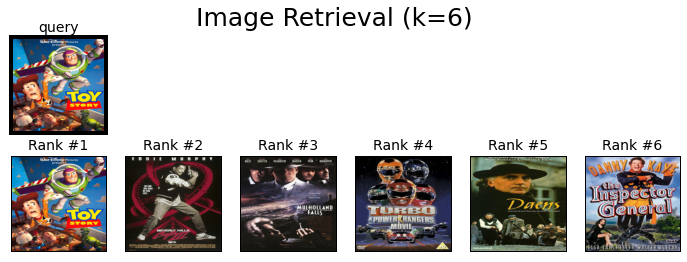

2 [2, 895, 951, 51, 744, 228]


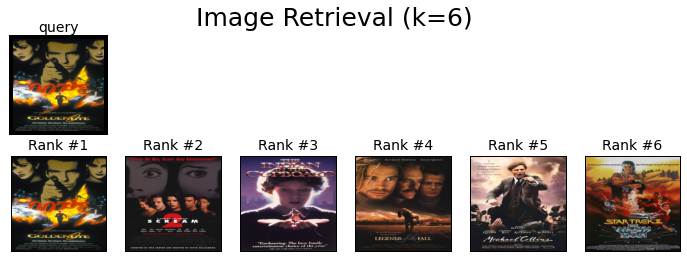

3 [3, 116, 1464, 203, 73, 689]


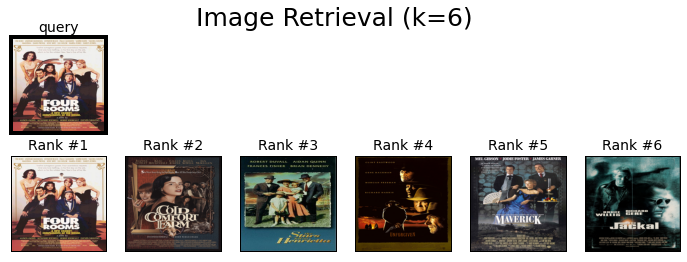

4 [4, 327, 895, 84, 657, 355]


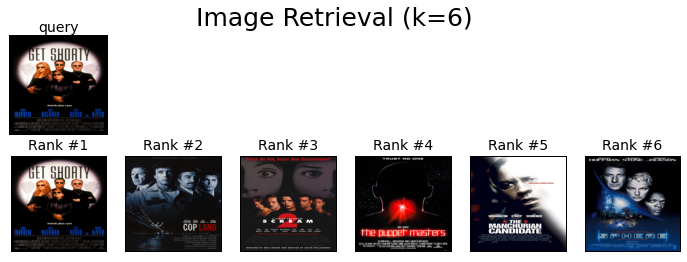

5 [5, 565, 564, 356, 895, 743]


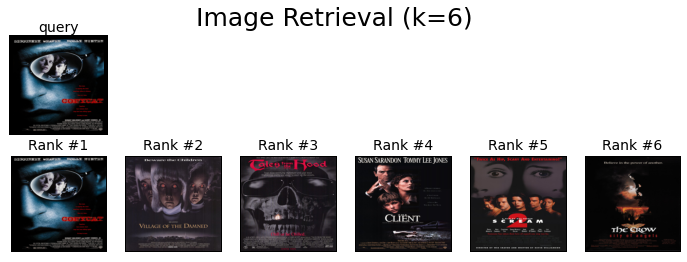

7 [7, 564, 569, 33, 565, 1598]


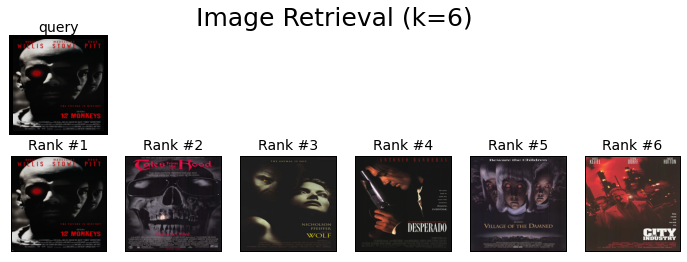

8 [8, 1553, 148, 740, 1292, 1483]


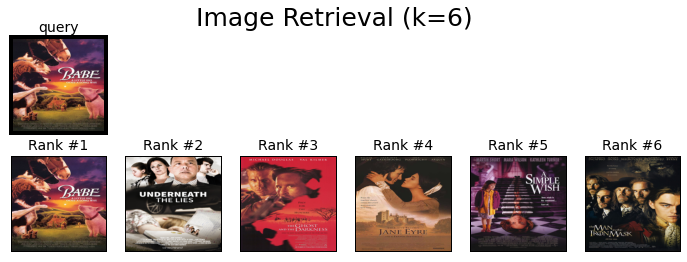

9 [9, 657, 1626, 895, 44, 245]


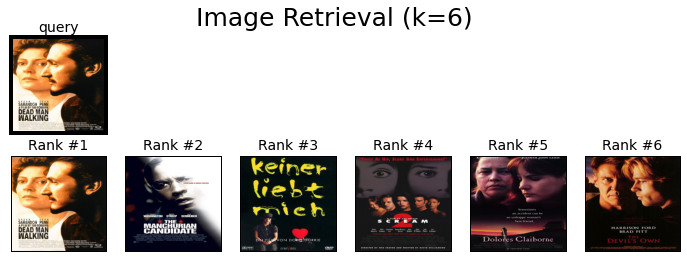

10 [10, 1087, 203, 562, 880, 1377]


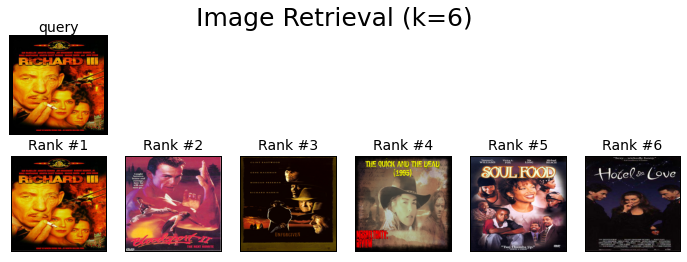

11 [11, 564, 743, 933, 619, 565]


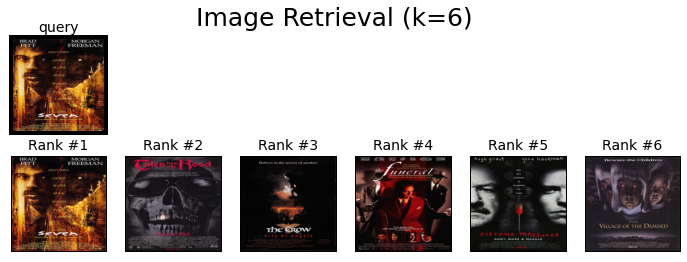

12 [12, 290, 1446, 276, 888, 695]


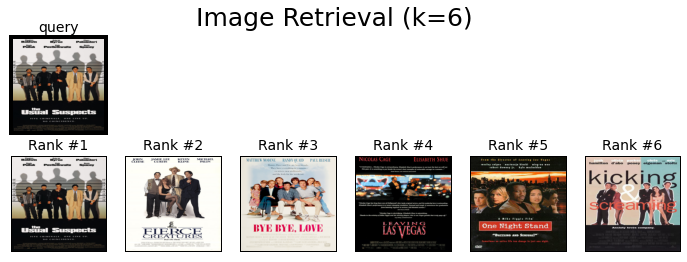

13 [13, 350, 743, 292, 588, 657]


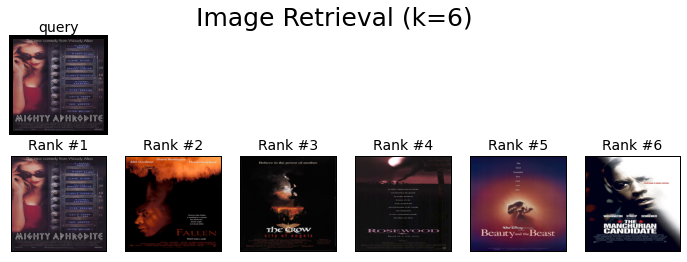

14 [14, 137, 1149, 1579, 224, 1317]


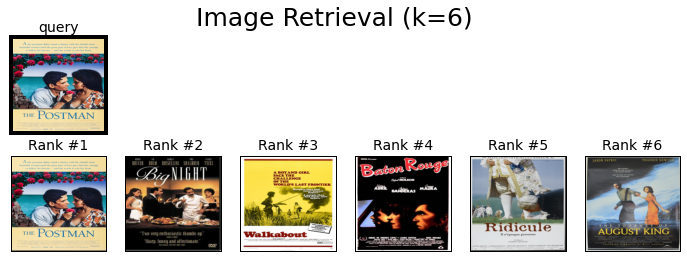

15 [15, 440, 706, 1025, 1212, 366]


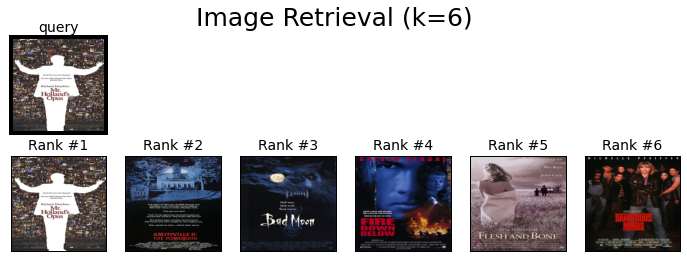

16 [16, 738, 1389, 880, 1564, 1311]


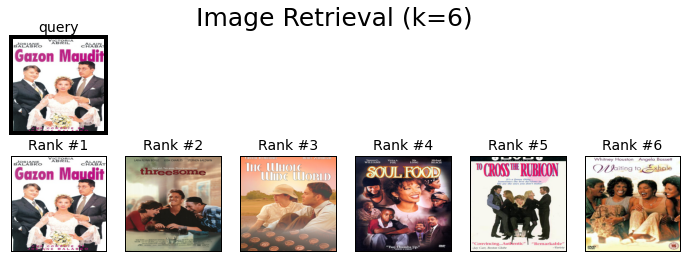

17 [17, 117, 895, 388, 751, 1087]


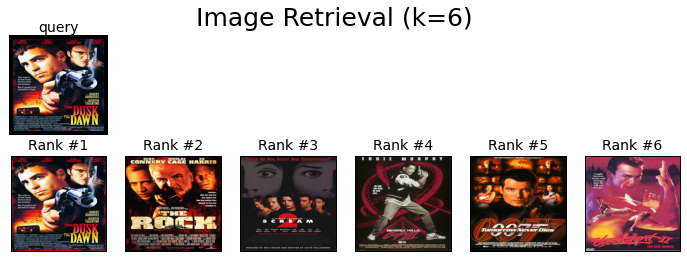

18 [18, 1084, 1222, 1579, 1474, 1020]


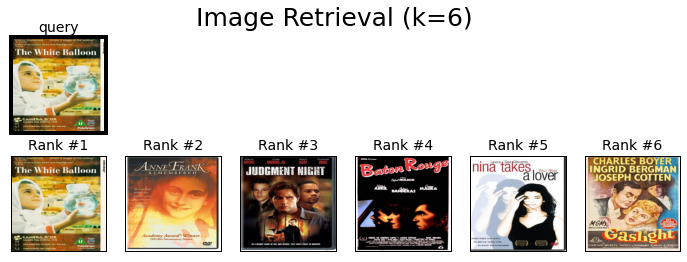

19 [19, 689, 757, 147, 1130, 203]


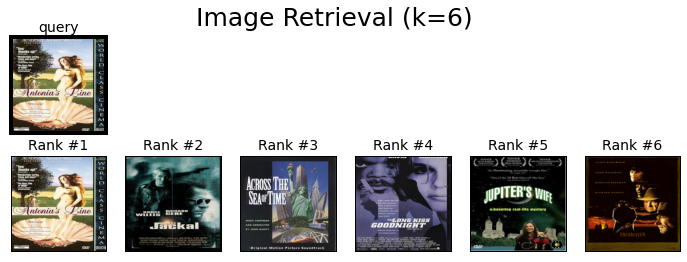

20 [20, 1626, 919, 563, 95, 895]


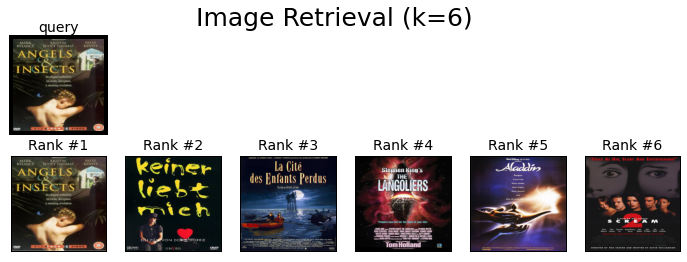

21 [21, 190, 386, 532, 1541, 738]


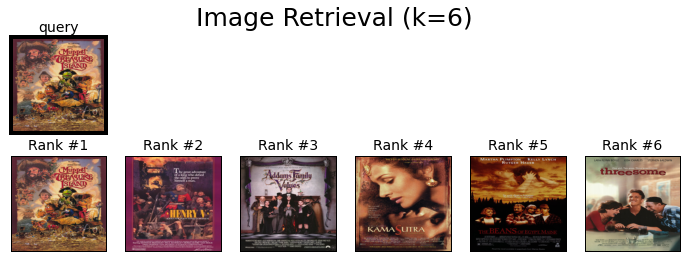

22 [22, 1624, 388, 744, 841, 895]


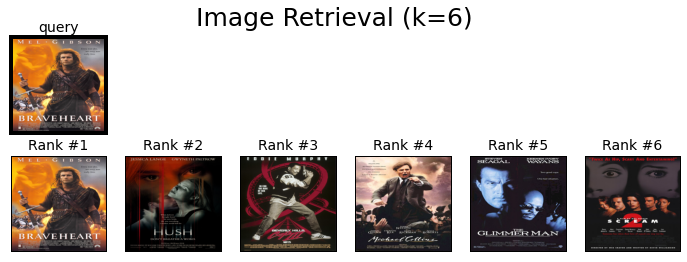

24 [24, 1087, 350, 816, 228, 33]


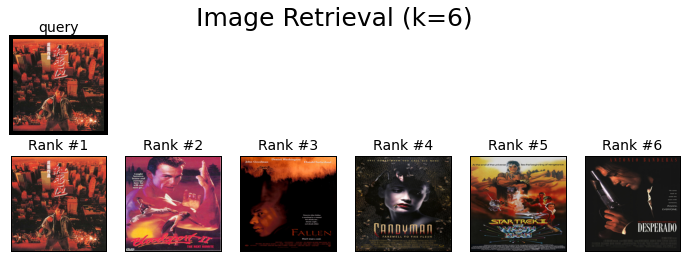

25 [25, 562, 564, 933, 567, 1161]


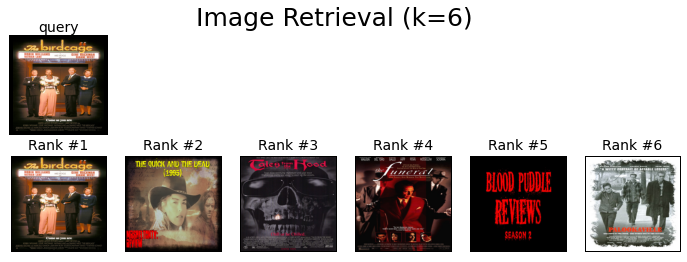

26 [1261, 1248, 1484, 867, 1418, 411]


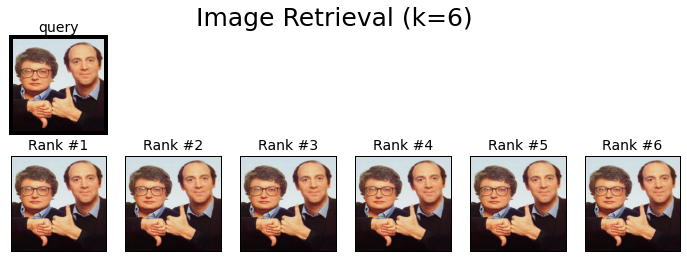

27 [27, 137, 1464, 695, 203, 415]


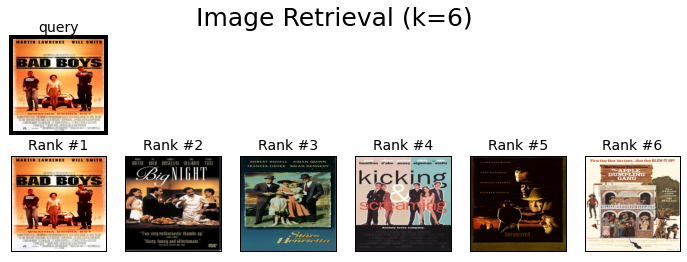

28 [28, 743, 569, 471, 292, 350]


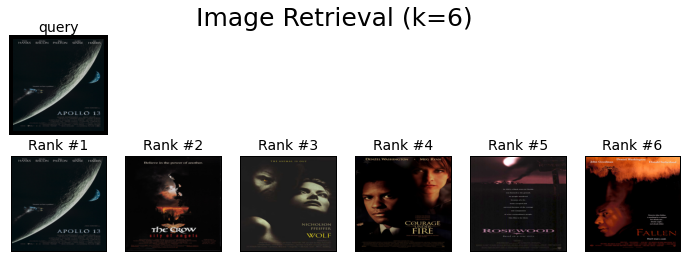

29 [29, 148, 823, 895, 831, 374]


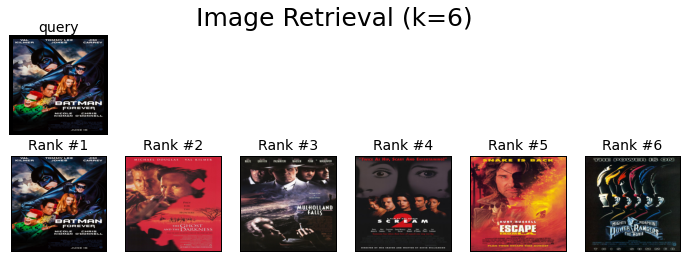

30 [30, 1215, 890, 120, 159, 167]


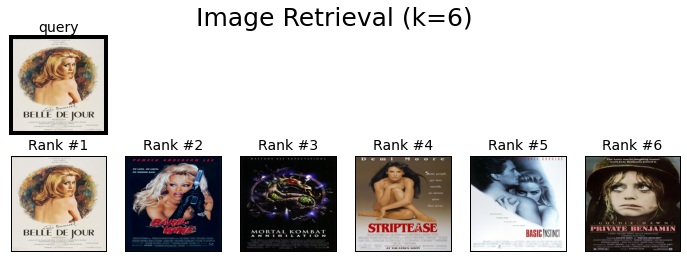

31 [31, 307, 84, 895, 350, 1157]


KeyboardInterrupt: 

In [28]:
#images for each rec
for id in recommendations:
    print(id, recommendations[id])
    res = list()
    for x in recommendations[id]:
        res.append(imgs_train[x])
    plot_query_retrieval(imgs_train[id], res, outFile=None)
    

In [34]:
#made a copy because i didn't want to overwrite the original recommendations
#remove self from the 6 KNN results, usually resulting in 5 left, but not always

import copy
unique_rec = copy.deepcopy(recommendations)
for id in unique_rec:
    try:
        unique_rec[id].remove(id)
    except:
        pass

In [52]:
#add movielens id back into the first column for the csv file

for id in unique_rec:
    unique_rec[id].insert(0, id)

In [53]:
#recommendations to csv file

import csv

file = open('recommendations.csv', 'w+', newline ='') 
  
# writing the data into the file 
with file:     
    write = csv.writer(file) 
    write.writerows(list(unique_rec.values())) 

---
# Helper methods below

In [ ]:
#Don't need to train on both the train and test i think
E_test = model.predict(X_test)
E_test_flatten = E_test.reshape((-1, np.prod(output_shape_model)))

In [ ]:
#unnecessary i think
X_test = np.array(np.array(imgs_test_transformed).reshape((-1,) + input_shape_model)
print(" -> X_test.shape = {}".format(X_test.shape))

In [46]:
np.savetxt("recommendations.csv", list(unique_rec.values()), delimiter=",", fmt="%i")

TypeError: Mismatch between array dtype ('object') and format specifier ('%i')

In [ ]:
model.summary()